In [1]:
# loading in the packages.
import random
import h5py
import math
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from functions_cnn import *
from cnn_utils import *


%matplotlib inline
np.random.seed(1)


In [2]:
print(tf.__version__)

2.7.0


#### Create a mood classifer using the TF Keras Sequential API

In [4]:
# Load the Data and Split the Data into Train/Test Sets.
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


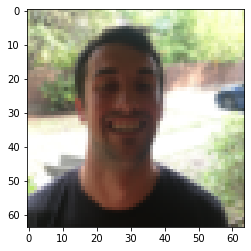

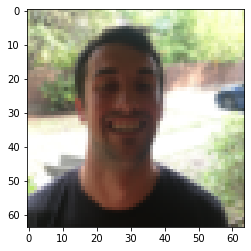

Label: 1


In [5]:
# display the images contained in the dataset.
# Select a random index of the image to display
index = random.randint(0, len(X_train)-1)

plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

# Display the image
plt.imshow(X_train[index])
#plt.axis('off')
plt.show()

# Get the label of the image
label = classes[Y_train[index][0]]

# Convert the label to a string
label = str(label)

# Print the label
print("Label: " + label)
# smiling = 1, not smiling = 0

In [6]:
# Creating the model; Implements the forward propagation for the binary classification model
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
        
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            tfl.Conv2D(filters = 32, kernel_size = (7,7), strides=(1,1)),
            tf.keras.layers.BatchNormalization(axis = 3),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation='sigmoid')
   
        ])
    
    return model

In [7]:
happy_model = happyModel()

In [8]:
# compile it for training with an optimizer
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [9]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [9]:
# Train and Evaluate the Model
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 32s 147ms/step - loss: 0.7947 - accuracy: 0.7533
Epoch 2/10
38/38 [==============================] - 5s 145ms/step - loss: 0.2030 - accuracy: 0.9200
Epoch 3/10
38/38 [==============================] - 6s 167ms/step - loss: 0.1434 - accuracy: 0.9400
Epoch 4/10
38/38 [==============================] - 7s 181ms/step - loss: 0.1090 - accuracy: 0.95670s - loss: 0.0981 - accuracy
Epoch 5/10
38/38 [==============================] - 6s 171ms/step - loss: 0.1519 - accuracy: 0.9433
Epoch 6/10
38/38 [==============================] - 6s 154ms/step - loss: 0.0979 - accuracy: 0.9650
Epoch 7/10
38/38 [==============================] - 6s 150ms/step - loss: 0.2491 - accuracy: 0.9150
Epoch 8/10
38/38 [==============================] - 6s 157ms/step - loss: 0.1828 - accuracy: 0.93500s - loss: 0.2019 - accu
Epoch 9/10
38/38 [==============================] - 7s 177ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 10/10
38/38 [============================

In [10]:
# evaluate against the test set.
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 55ms/step - loss: 0.6956 - accuracy: 0.5600


[0.6956468820571899, 0.5600000023841858]

#### Create a 6 sign language digits classifer using the TF Keras Functional API

In [11]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 0
(1080, 64, 64, 3)
(1, 1080)


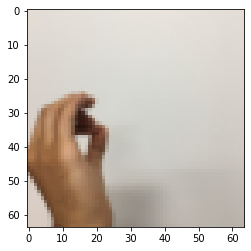

In [12]:
# Example of an image from the dataset
index = random.randint(0, len(X_train_orig)-1)
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))
print(X_train_orig.shape)
print(Y_train_orig.shape)

In [13]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

In [14]:
# Split the Data into Train/Test Sets

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [15]:
#  convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), strides=(1, 1), padding='SAME')(input_img)
    # RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPooling2D(pool_size=(8, 8), strides=(8, 8), padding='SAME')(A1)
    # CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='SAME')(P1)
    # RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='SAME')(A2)
    # FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    # Dense layer
    # 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [16]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [17]:
# Train the Model
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 104ms/step - loss: 1.8043 - accuracy: 0.1722 - val_loss: 1.7874 - val_accuracy: 0.2000
Epoch 2/100
17/17 [==============================] - 2s 109ms/step - loss: 1.7851 - accuracy: 0.2037 - val_loss: 1.7804 - val_accuracy: 0.2750
Epoch 3/100
17/17 [==============================] - 2s 120ms/step - loss: 1.7787 - accuracy: 0.2287 - val_loss: 1.7731 - val_accuracy: 0.2500
Epoch 4/100
17/17 [==============================] - 2s 117ms/step - loss: 1.7724 - accuracy: 0.2676 - val_loss: 1.7645 - val_accuracy: 0.3083
Epoch 5/100
17/17 [==============================] - 2s 105ms/step - loss: 1.7613 - accuracy: 0.3093 - val_loss: 1.7525 - val_accuracy: 0.3000
Epoch 6/100
17/17 [==============================] - 2s 118ms/step - loss: 1.7467 - accuracy: 0.3231 - val_loss: 1.7361 - val_accuracy: 0.3917
Epoch 7/100
17/17 [==============================] - 2s 145ms/step - loss: 1.7274 - accuracy: 0.3407 - val_loss: 1.7152 - val_accuracy: 0.3750

Epoch 58/100
17/17 [==============================] - 2s 104ms/step - loss: 0.5909 - accuracy: 0.8111 - val_loss: 0.6611 - val_accuracy: 0.7417
Epoch 59/100
17/17 [==============================] - 2s 95ms/step - loss: 0.5840 - accuracy: 0.8130 - val_loss: 0.6548 - val_accuracy: 0.7417
Epoch 60/100
17/17 [==============================] - 2s 95ms/step - loss: 0.5774 - accuracy: 0.8157 - val_loss: 0.6482 - val_accuracy: 0.7500
Epoch 61/100
17/17 [==============================] - 2s 93ms/step - loss: 0.5707 - accuracy: 0.8194 - val_loss: 0.6423 - val_accuracy: 0.7500
Epoch 62/100
17/17 [==============================] - 2s 95ms/step - loss: 0.5639 - accuracy: 0.8213 - val_loss: 0.6363 - val_accuracy: 0.7500
Epoch 63/100
17/17 [==============================] - 2s 93ms/step - loss: 0.5571 - accuracy: 0.8222 - val_loss: 0.6307 - val_accuracy: 0.7500
Epoch 64/100
17/17 [==============================] - 2s 94ms/step - loss: 0.5508 - accuracy: 0.8250 - val_loss: 0.6250 - val_accuracy: 0.750

In [20]:
history.history

{'loss': [1.8042614459991455,
  1.7851136922836304,
  1.7787054777145386,
  1.772423267364502,
  1.7613459825515747,
  1.746708631515503,
  1.7273823022842407,
  1.703140139579773,
  1.6758805513381958,
  1.6436156034469604,
  1.6054859161376953,
  1.5636993646621704,
  1.51956307888031,
  1.4743305444717407,
  1.429398775100708,
  1.3834528923034668,
  1.3386800289154053,
  1.2943943738937378,
  1.253092885017395,
  1.210889458656311,
  1.172425389289856,
  1.1352429389953613,
  1.101765513420105,
  1.06890869140625,
  1.0378226041793823,
  1.0100394487380981,
  0.9832392930984497,
  0.9593082070350647,
  0.9369238615036011,
  0.9154417514801025,
  0.8951457142829895,
  0.875497579574585,
  0.8583836555480957,
  0.8412917256355286,
  0.8260263800621033,
  0.8113179206848145,
  0.7965543866157532,
  0.7837260961532593,
  0.7702552676200867,
  0.7575119137763977,
  0.7454485893249512,
  0.7338064312934875,
  0.7225441336631775,
  0.7122767567634583,
  0.7016799449920654,
  0.69212812185

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

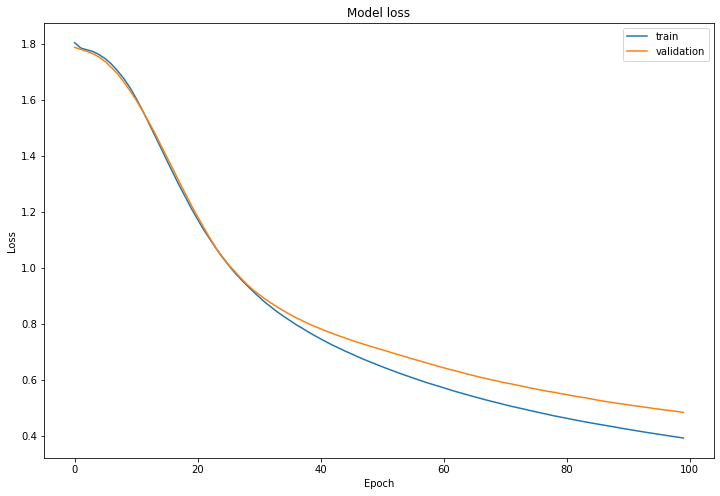

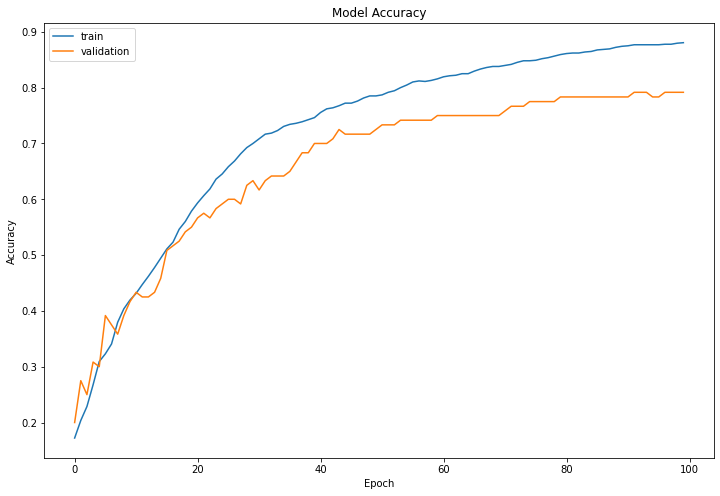

In [21]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')